<a href="https://colab.research.google.com/github/Marwenboughanmi/EVS-project-1/blob/main/percent_EVs_vs_Oil_Cunsumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the required libraries
!pip install prophet

In [2]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Import files that we'll be using
from google.colab import files
ev_data_file = files.upload()
oil_consumption_file = files.upload()

Saving share-car-stocks-electric.csv to share-car-stocks-electric.csv


Saving energy-consumption-by-source-and-country.csv to energy-consumption-by-source-and-country.csv


# Find the Top Five and Bottom Five Countries with the Highest Percentages of Electric Vehicles

In [5]:
# Create a data frame from the ev data
ev_df = pd.read_csv("share-car-stocks-electric.csv")
ev_df = ev_df.set_index('Year')
ev_df=ev_df.rename(columns={'Share of car stocks that are electric':'% of Cars that are EVs', 'Entity': 'Country'})
del ev_df['Code']

# Remove entities that are not countries
ev_df = ev_df[ev_df['Country'] != 'Rest of World']
ev_df = ev_df[ev_df['Country'] != 'World']

# Display the ev dataframe
display(ev_df.head())
display(ev_df.tail())

,Country,% of Cars that are EVs
Year,,
2011,Australia,0.00039
2012,Australia,0.00240
2013,Australia,0.00460
2014,Australia,0.01400
2015,Australia,0.02700


,Country,% of Cars that are EVs
Year,,
2019,United States,0.62
2020,United States,0.77
2021,United States,0.95
2022,United States,1.30
2023,United States,2.10


In [7]:
ev_df.index.unique()

Index([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2010],
      dtype='int64', name='Year')

In [6]:
ev_df['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'China', 'Denmark', 'Europe', 'European Union (27)', 'Finland',
       'France', 'Germany', 'Greece', 'Iceland', 'India', 'Israel',
       'Italy', 'Japan', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
       'Poland', 'Portugal', 'South Africa', 'South Korea', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'United Kingdom',
       'United States'], dtype=object)

In [41]:
#find the countires with the highest percentage of EVs in the most recent available year
ev_data_2023 = ev_df.loc[ev_df.index == 2023]
ev_data_2023 = ev_data_2023.sort_values(by=['% of Cars that are EVs'], ascending=False)
display(ev_data_2023.head())
display(ev_data_2023.tail())

,Country,% of Cars that are EVs
Year,,
2023,Norway,29.0
2023,Iceland,18.0
2023,Denmark,11.0
2023,Sweden,11.0
2023,Netherlands,8.3


,Country,% of Cars that are EVs
Year,,
2023,India,0.310
2023,Brazil,0.210
2023,Mexico,0.140
2023,Chile,0.087
2023,South Africa,0.044


['Norway', 'Iceland', 'Denmark', 'Sweden', 'Netherlands']


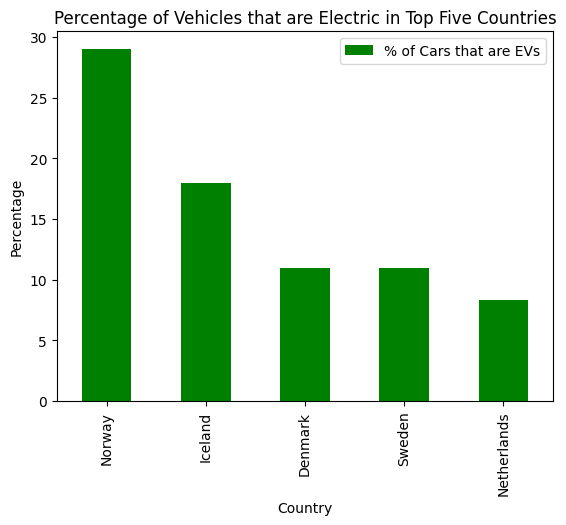

In [42]:
# Create a list and a bar graph of the top 5 Countries
top_5_countries = ev_data_2023.head()
top_5_country_list = top_5_countries['Country'].tolist()

print(top_5_country_list)

top_5_countries.plot(kind='bar',
                     x='Country', y='% of Cars that are EVs',
                     title='Percentage of Vehicles that are Electric in Top Five Countries',
                     ylabel='Percentage',
                     color ='g')
plt.show()

['India', 'Brazil', 'Mexico', 'Chile', 'South Africa']


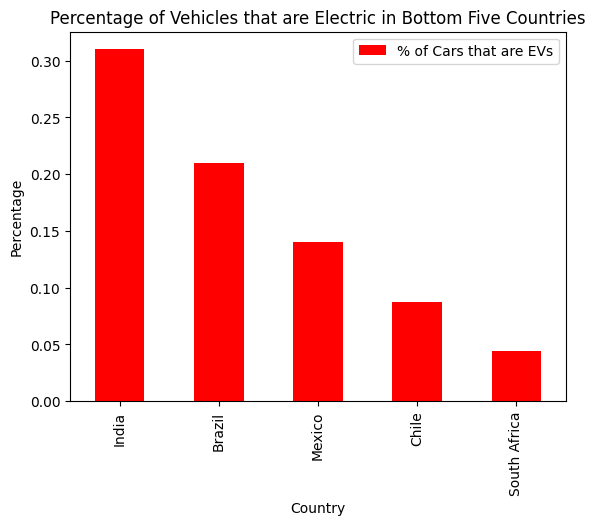

In [43]:
# Create a list and a bar graph of the bottom 5 Countries
bottom_5_countries = ev_data_2023.tail()
bottom_5_country_list = bottom_5_countries['Country'].tolist()

print(bottom_5_country_list)

bottom_5_countries.plot(kind='bar',
                     x='Country', y='% of Cars that are EVs',
                     title='Percentage of Vehicles that are Electric in Bottom Five Countries',
                     ylabel='Percentage',
                     color ='r')
plt.show()

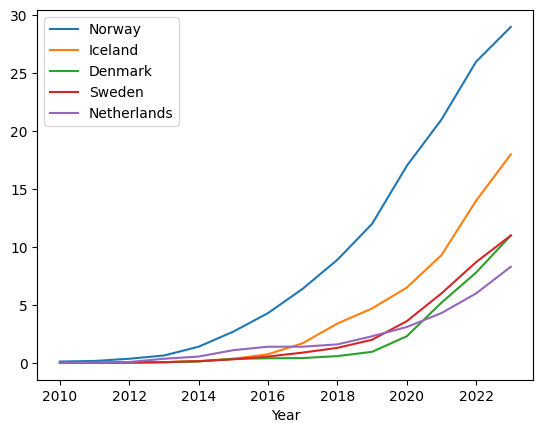

In [44]:
#plotting the top 5 countries with the highest percentage of EV's
fig, ax = plt.subplots()

ev_df.loc[ev_df['Country']=='Norway']['% of Cars that are EVs'].plot(ax=ax, label="Norway")
ev_df.loc[ev_df['Country']=='Iceland']['% of Cars that are EVs'].plot(ax=ax, label='Iceland')
ev_df.loc[ev_df['Country']=='Denmark']['% of Cars that are EVs'].plot(ax=ax, label='Denmark')
ev_df.loc[ev_df['Country']=='Sweden']['% of Cars that are EVs'].plot(ax=ax, label='Sweden')
ev_df.loc[ev_df['Country']=='Netherlands']['% of Cars that are EVs'].plot(ax=ax, label='Netherlands')

#ev_df.loc[ev_df['Country']=='United States'].plot(ax=ax, label='United States')
plt.legend(loc='best')
plt.show()

In [15]:
pop_data=files.upload()

Saving API_SP.POP.TOTL_DS2_en_csv_v2_31753 - API_SP.POP.TOTL_DS2_en_csv_v2_31753.csv to API_SP.POP.TOTL_DS2_en_csv_v2_31753 - API_SP.POP.TOTL_DS2_en_csv_v2_31753.csv


In [17]:
pop_df = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_31753 - API_SP.POP.TOTL_DS2_en_csv_v2_31753.csv")
pop_df=pop_df[['Country Name']+[str(year) for year in range(2010, 2024)]]
pop_df=pop_df.rename(columns={'Country Name': 'Country'})
pop_df
#df[['Country'] + [str(year) for year in range(2010, 2024)]]

,Country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,100341.0,101288.0,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0
1,Africa Eastern and Southern,523459657.0,537792950.0,552530654.0,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0
2,Afghanistan,28189672.0,29249157.0,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0
3,Africa Western and Central,356337762.0,366489204.0,376797999.0,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0
4,Angola,23364185.0,24259111.0,25188292.0,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,1792563.0,1799338.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1768086.0,1756374.0
262,"Yemen, Rep.",24743946.0,25475610.0,26223391.0,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0,34449825.0
263,South Africa,51784921.0,52443325.0,53145033.0,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0,60414495.0
264,Zambia,13792086.0,14265814.0,14744658.0,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0,20569737.0


In [20]:
df_melted= pd.melt(pop_df, id_vars=['Country'], var_name='Year', value_name='Population')
df_melted.set_index('Year', inplace=True)
df_melted

,Country,Population
Year,,
2010,Aruba,100341.0
2010,Africa Eastern and Southern,523459657.0
2010,Afghanistan,28189672.0
2010,Africa Western and Central,356337762.0
2010,Angola,23364185.0
...,...,...
2023,Kosovo,1756374.0
2023,"Yemen, Rep.",34449825.0
2023,South Africa,60414495.0


# Merge Motor Gasoline Data With EV Data

In [8]:
# Create a data frame for the oil consumption data
oil_con_df = pd.read_csv("energy-consumption-by-source-and-country.csv")
oil_con_df = oil_con_df.set_index('Year')
oil_con_df=oil_con_df.rename(columns={'Entity': 'Country'})

#isolate oil column
oil_con_df = oil_con_df[['Country','Oil consumption - TWh']]

# Set up data in oil_con_df to match ev_df
display(oil_con_df.head())
display(oil_con_df.tail())


,Country,Oil consumption - TWh
Year,,
1971,Africa,474.30540
1972,Africa,510.72960
1973,Africa,549.80396
1974,Africa,569.73850
1975,Africa,597.67100


,Country,Oil consumption - TWh
Year,,
2019,Zimbabwe,NaN
2020,Zimbabwe,NaN
2021,Zimbabwe,NaN
2022,Zimbabwe,NaN
2023,Zimbabwe,NaN


In [9]:
oil_con_df['Country'].unique()

array(['Africa', 'Africa (EI)', 'Algeria', 'Angola', 'Argentina', 'Asia',
       'Asia Pacific (EI)', 'Australia', 'Austria', 'Azerbaijan',
       'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Bolivia', 'Brazil',
       'Brunei', 'Bulgaria', 'CIS (EI)', 'Canada', 'Central America (EI)',
       'Chad', 'Chile', 'China', 'Colombia', 'Congo', 'Croatia', 'Cuba',
       'Curacao', 'Cyprus', 'Czechia', 'Democratic Republic of Congo',
       'Denmark', 'Eastern Africa (EI)', 'Ecuador', 'Egypt',
       'Equatorial Guinea', 'Estonia', 'Europe', 'Europe (EI)',
       'European Union (27)', 'Finland', 'France', 'Gabon', 'Germany',
       'Greece', 'Guyana', 'High-income countries', 'Hong Kong',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait',
       'Latvia', 'Libya', 'Lithuania', 'Low-income countries',
       'Lower-middle-income countries', 'Luxembourg', 'Madagascar',
       'Malaysia', 'Mexico', 'Middle 

In [10]:
oil_con_df.index.unique()

Index([1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022, 2023, 1965, 1966, 1967, 1968, 1969, 1970],
      dtype='int64', name='Year')

In [35]:
merged_df = pd.merge(ev_df, oil_con_df, on=['Country', 'Year'], how='inner')
merged_df.index = pd.to_datetime(merged_df.index, format='%Y')
df_melted.index = pd.to_datetime(df_melted.index, format='%Y')

In [36]:
# merge the dfs

merged_df= pd.merge(merged_df,df_melted, on=['Country', 'Year'], how='inner')


#display the merged df
display(merged_df.head())
display(merged_df.tail())

,Country,% of Cars that are EVs,Oil consumption - TWh,Population
Year,,,,
2011-01-01,Australia,0.00039,547.06030,22340024.0
2012-01-01,Australia,0.00240,561.41907,22733465.0
2013-01-01,Australia,0.00460,578.03705,23128129.0
2014-01-01,Australia,0.01400,575.42820,23475686.0
2015-01-01,Australia,0.02700,570.29706,23815995.0


,Country,% of Cars that are EVs,Oil consumption - TWh,Population
Year,,,,
2019-01-01,United States,0.62,10287.683,328329953.0
2020-01-01,United States,0.77,9035.320,331526933.0
2021-01-01,United States,0.95,9868.985,332048977.0
2022-01-01,United States,1.30,9930.587,333271411.0
2023-01-01,United States,2.10,9960.662,334914895.0


In [37]:
merged_df['Oil Consumption Per Capita'] = merged_df['Oil consumption - TWh'] / merged_df['Population']
merged_df

,Country,% of Cars that are EVs,Oil consumption - TWh,Population,Oil Consumption Per Capita
Year,,,,,
2011-01-01,Australia,0.00039,547.06030,22340024.0,0.000024
2012-01-01,Australia,0.00240,561.41907,22733465.0,0.000025
2013-01-01,Australia,0.00460,578.03705,23128129.0,0.000025
2014-01-01,Australia,0.01400,575.42820,23475686.0,0.000025
2015-01-01,Australia,0.02700,570.29706,23815995.0,0.000024
...,...,...,...,...,...
2019-01-01,United States,0.62000,10287.68300,328329953.0,0.000031
2020-01-01,United States,0.77000,9035.32000,331526933.0,0.000027
2021-01-01,United States,0.95000,9868.98500,332048977.0,0.000030


In [13]:
merged_df['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'China', 'Denmark', 'Europe', 'European Union (27)', 'Finland',
       'France', 'Germany', 'Greece', 'Iceland', 'India', 'Israel',
       'Italy', 'Japan', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
       'Poland', 'Portugal', 'South Africa', 'South Korea', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'United Kingdom',
       'United States'], dtype=object)

In [14]:
merged_df.index.unique()

Index([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2010],
      dtype='int64', name='Year')

# Look For Trends Between Oil Consumption and Percentage of Vehicles that are Electric

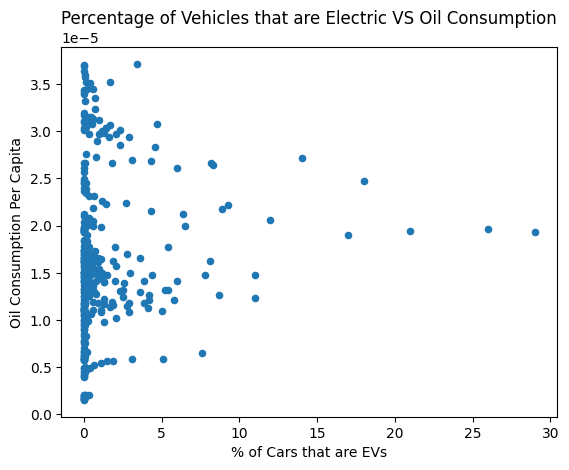

In [38]:
fig, ax = plt.subplots()

merged_df.plot(kind='scatter', ax=ax, x='% of Cars that are EVs', y='Oil Consumption Per Capita', title = 'Percentage of Vehicles that are Electric VS Oil Consumption' )
plt.show()

plt.show()

In [39]:
merged_df[['% of Cars that are EVs','Oil consumption - TWh']].corr()

,% of Cars that are EVs,Oil consumption - TWh
% of Cars that are EVs,1.000000,-0.072551
Oil consumption - TWh,-0.072551,1.000000


plot for top top 5 and bottom 5 countries by % of ev's

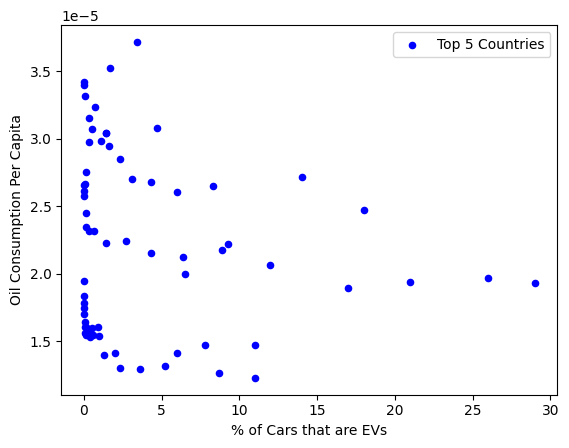

In [45]:
fig, ax = plt.subplots()

# Filter the DataFrame to include only the top 5 countries by '% of Cars that are EVs'
filter_df = merged_df[merged_df['Country'].isin(top_5_country_list)]

# Plot the filtered top 5 countries
filter_df.plot(kind='scatter', ax=ax, x='% of Cars that are EVs', y='Oil Consumption Per Capita', color='blue', label='Top 5 Countries')
plt.show()

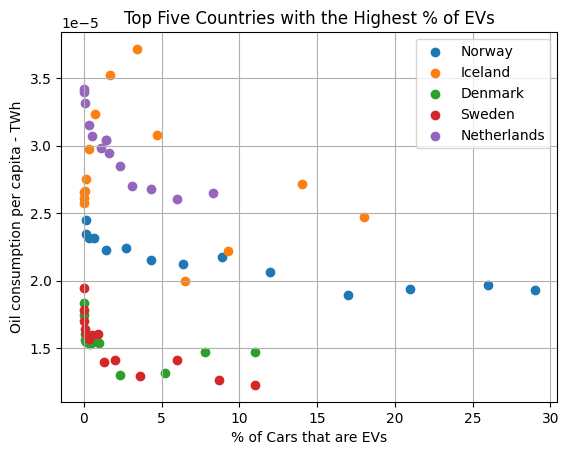

In [47]:
fig, ax = plt.subplots()

norway = merged_df.loc[merged_df['Country']=='Norway']['% of Cars that are EVs']
iceland = merged_df.loc[merged_df['Country']=='Iceland']['% of Cars that are EVs']
denmark = merged_df.loc[merged_df['Country']=='Denmark']['% of Cars that are EVs']
sweden = merged_df.loc[merged_df['Country']=='Sweden']['% of Cars that are EVs']
netherlands = merged_df.loc[merged_df['Country']=='Netherlands']['% of Cars that are EVs']

plt.scatter(norway, merged_df.loc[merged_df['Country']=='Norway']['Oil Consumption Per Capita'], label = 'Norway')
plt.scatter(iceland, merged_df.loc[merged_df['Country']=='Iceland']['Oil Consumption Per Capita'], label = 'Iceland')
plt.scatter(denmark, merged_df.loc[merged_df['Country']=='Denmark']['Oil Consumption Per Capita'], label ='Denmark')
plt.scatter(sweden, merged_df.loc[merged_df['Country']=='Sweden']['Oil Consumption Per Capita'], label = 'Sweden')
plt.scatter(netherlands, merged_df.loc[merged_df['Country']=='Netherlands']['Oil Consumption Per Capita'], label = 'Netherlands')

plt.legend(loc='best')
plt.xlabel('% of Cars that are EVs')
plt.ylabel('Oil consumption (TWh) per capita')
plt.title('Top Five Countries with the Highest % of EVs')
plt.grid(True)
plt.show()

In [ ]:
filter_df.head(10)

,Country,% of Cars that are EVs,Oil consumption - TWh
Year,,,
2010,Denmark,0.0037,101.928290
2011,Denmark,0.0230,97.148980
2012,Denmark,0.0560,89.821655
2013,Denmark,0.0680,87.707780
2014,Denmark,0.1300,87.400290
2015,Denmark,0.3500,88.928200
2016,Denmark,0.4000,89.055590
2017,Denmark,0.4200,88.506580
2018,Denmark,0.5900,89.400990


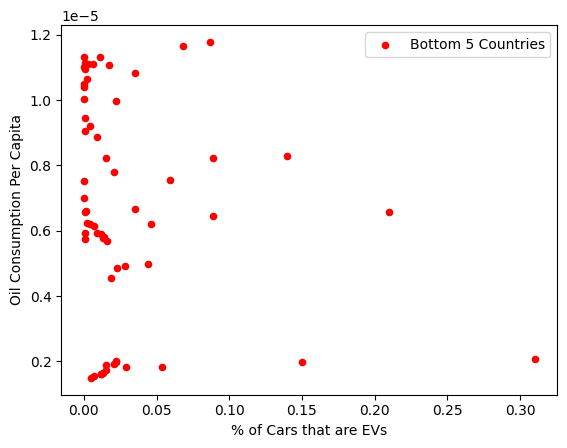

In [48]:
fig, ax = plt.subplots()
filter2_df = merged_df[merged_df['Country'].isin(bottom_5_country_list)]

# Plot the bottom 5 countries
filter2_df.plot(kind='scatter', ax=ax, x='% of Cars that are EVs', y='Oil Consumption Per Capita', color='red', label='Bottom 5 Countries')

plt.show()

In [ ]:
print(bottom_5_country_list)

['India', 'Brazil', 'Mexico', 'Chile', 'South Africa']


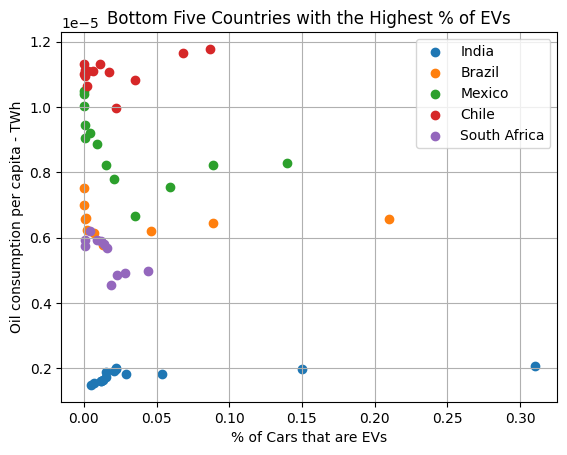

In [50]:
fig, ax = plt.subplots()

india = merged_df.loc[merged_df['Country']=='India']['% of Cars that are EVs']
brazil = merged_df.loc[merged_df['Country']=='Brazil']['% of Cars that are EVs']
mexico = merged_df.loc[merged_df['Country']=='Mexico']['% of Cars that are EVs']
chile = merged_df.loc[merged_df['Country']=='Chile']['% of Cars that are EVs']
south_africa = merged_df.loc[merged_df['Country']=='South Africa']['% of Cars that are EVs']

plt.scatter(india, merged_df.loc[merged_df['Country']=='India']['Oil Consumption Per Capita'], label = 'India')
plt.scatter(brazil, merged_df.loc[merged_df['Country']=='Brazil']['Oil Consumption Per Capita'], label = 'Brazil')
plt.scatter(mexico, merged_df.loc[merged_df['Country']=='Mexico']['Oil Consumption Per Capita'], label ='Mexico')
plt.scatter(chile, merged_df.loc[merged_df['Country']=='Chile']['Oil Consumption Per Capita'], label = 'Chile')
plt.scatter(south_africa, merged_df.loc[merged_df['Country']=='South Africa']['Oil Consumption Per Capita'], label = 'South Africa')

plt.legend(loc='best')
plt.xlabel('% of Cars that are EVs')
plt.ylabel('Oil consumption (TWh) per capita')
plt.title('Bottom Five Countries with the Highest % of EVs')
plt.grid(True)
plt.show()

In [ ]:
ev_df.head()

,Country,% of Cars that are EVs
Year,,
2011,Australia,0.00039
2012,Australia,0.00240
2013,Australia,0.00460
2014,Australia,0.01400
2015,Australia,0.02700


## Forcasting to predict EV global development

In [ ]:
# Forcast the future of the ev datafram
ev_new = ev_df.reset_index(drop = False)
ev_new.head()

,Year,Country,% of Cars that are EVs
0,2011,Australia,0.00039
1,2012,Australia,0.00240
2,2013,Australia,0.00460
3,2014,Australia,0.01400
4,2015,Australia,0.02700


In [ ]:
del ev_new['Country']
ev_new['Year'] = pd.to_datetime(ev_new['Year'], format='%Y')
ev_new.head()

,Year,% of Cars that are EVs
0,2011-01-01,0.00039
1,2012-01-01,0.00240
2,2013-01-01,0.00460
3,2014-01-01,0.01400
4,2015-01-01,0.02700


In [ ]:
ev_new.columns = ['ds', 'y']
ev_new

,ds,y
0,2011-01-01,0.00039
1,2012-01-01,0.00240
2,2013-01-01,0.00460
3,2014-01-01,0.01400
4,2015-01-01,0.02700
...,...,...
433,2019-01-01,0.62000
434,2020-01-01,0.77000
435,2021-01-01,0.95000
436,2022-01-01,1.30000


In [ ]:
# Creates Prophet model
model = Prophet()

model.fit(ev_new)

# Forecast future 5 years
future = model.make_future_dataframe(periods=5, freq='Y')

forecast = model.predict(future)
forecast.tail()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5qhusafe/99vh4gd_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5qhusafe/ougns2vo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68526', 'data', 'file=/tmp/tmp5qhusafe/99vh4gd_.json', 'init=/tmp/tmp5qhusafe/ougns2vo.json', 'output', 'file=/tmp/tmp5qhusafe/prophet_modelffyanrn0/prophet_model-20241002010414.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:04:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:04:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
14,2023-12-31,5.205233,1.626394,8.336625,5.185642,5.223622,-0.238554,-0.238554,-0.238554,-0.238554,-0.238554,-0.238554,0.0,0.0,0.0,4.966680
15,2024-12-31,5.964539,2.303030,8.920890,5.899502,6.024821,-0.264930,-0.264930,-0.264930,-0.264930,-0.264930,-0.264930,0.0,0.0,0.0,5.699609
16,2025-12-31,6.721770,3.110039,9.799432,6.599353,6.844965,-0.256266,-0.256266,-0.256266,-0.256266,-0.256266,-0.256266,0.0,0.0,0.0,6.465504
17,2026-12-31,7.479001,3.854444,10.768313,7.283540,7.669396,-0.247470,-0.247470,-0.247470,-0.247470,-0.247470,-0.247470,0.0,0.0,0.0,7.231531
18,2027-12-31,8.236232,4.501269,11.313920,7.964215,8.500559,-0.238554,-0.238554,-0.238554,-0.238554,-0.238554,-0.238554,0.0,0.0,0.0,7.997679


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


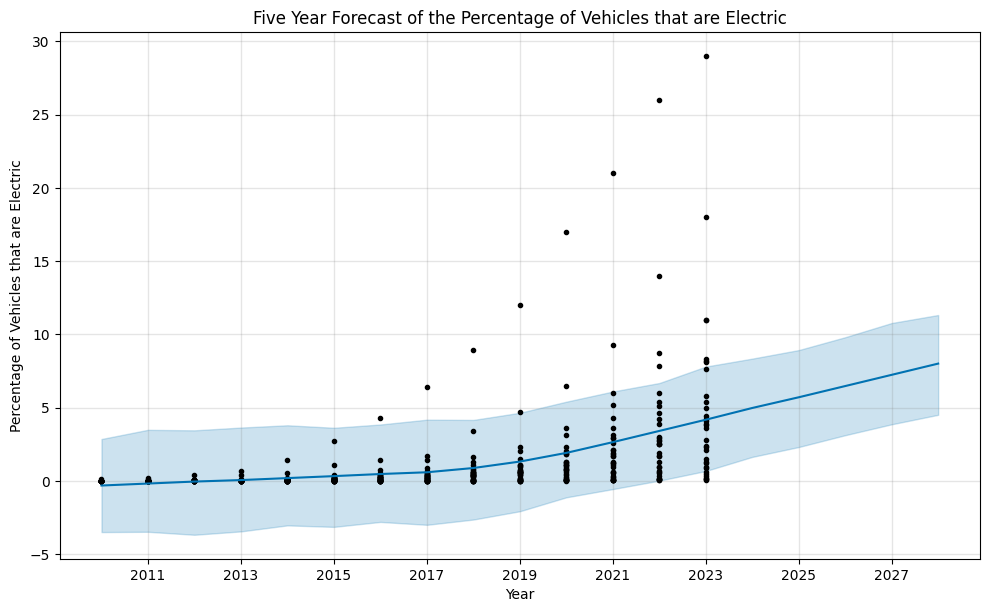

In [ ]:
# Plots the forecast
model.plot(forecast)
plt.title('Five Year Forecast of the Percentage of Vehicles that are Electric')
plt.xlabel('Year')
plt.ylabel('Percentage of Vehicles that are Electric')
plt.show()

## Forcasting of Gas Consumption globally

In [ ]:
# Reset index and rename columns for Prophet
oil_con_df = oil_con_df.reset_index()
oil_con_df = oil_con_df[['Year', 'Oil consumption - TWh']].rename(columns={'Year': 'ds', 'Oil consumption - TWh': 'y'})

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5qhusafe/k3xwc330.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5qhusafe/y788zizw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36498', 'data', 'file=/tmp/tmp5qhusafe/k3xwc330.json', 'init=/tmp/tmp5qhusafe/y788zizw.json', 'output', 'file=/tmp/tmp5qhusafe/prophet_model8kxm9du3/prophet_model-20241002010143.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:01:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:01:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

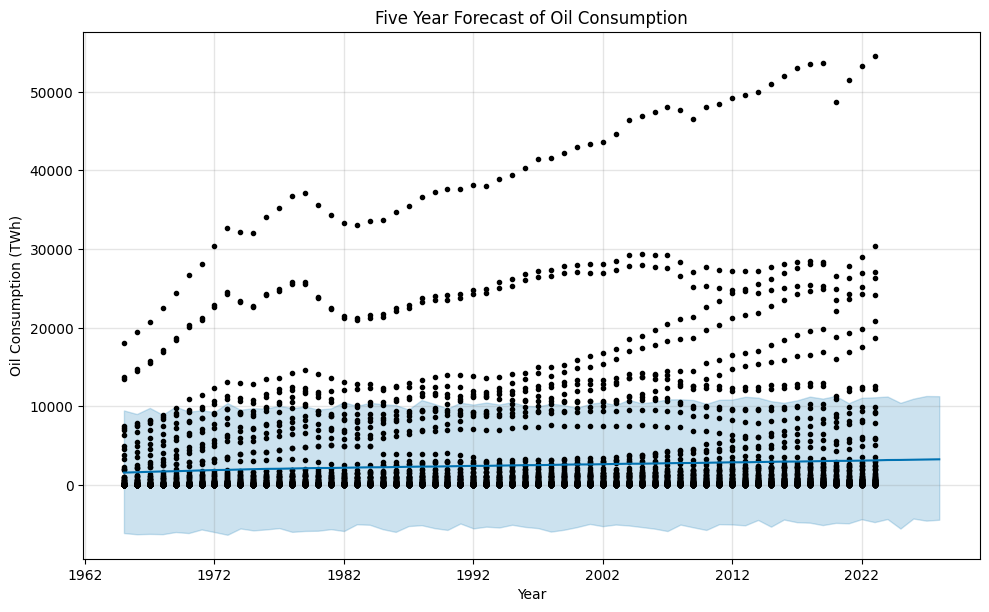

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

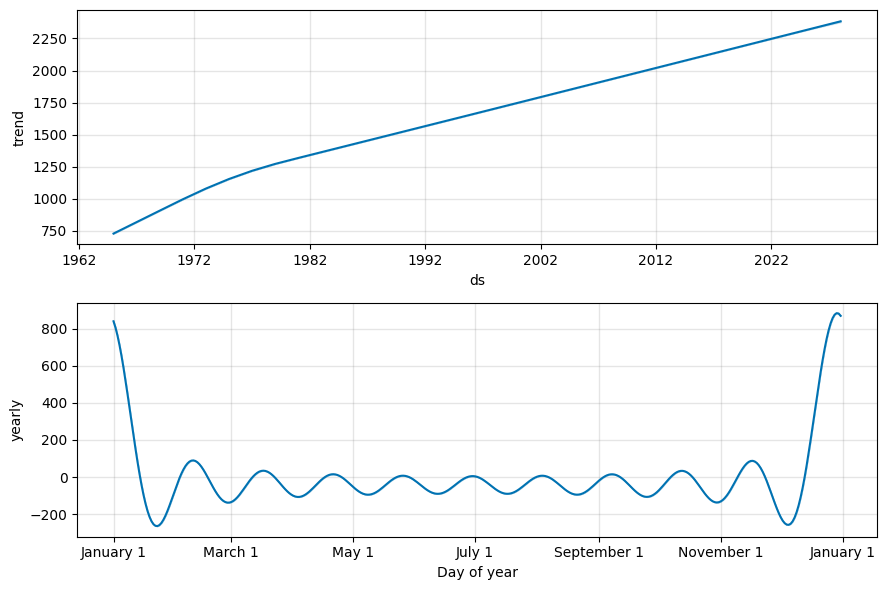

In [ ]:



# Convert 'ds' (Year) column to datetime format
oil_con_df['ds'] = pd.to_datetime(oil_con_df['ds'], format='%Y')

# Initialize Prophet model
model = Prophet()

# Fit the model with the data
model.fit(oil_con_df)

# Create a future DataFrame for the next 5 years
future = model.make_future_dataframe(periods=5, freq='Y')

# Make predictions
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title('Five Year Forecast of Oil Consumption')
plt.xlabel('Year')
plt.ylabel('Oil Consumption (TWh)')
plt.show()

# Plot forecast components (trend, seasonality)
model.plot_components(forecast)
plt.show()